In [1]:
import vk
from time import sleep
vk.logger.setLevel('INFO')

In [2]:
login = '' #логин
password = '' #паролька
vk_id = ''  #это айдишник приложения

In [3]:
session = vk.AuthSession(app_id=vk_id, user_login=login, user_password=password, scope='wall, messages') 
vkapi = vk.API(session)
messages = vkapi.messages.get(count=1)

2017-11-20 14:16:57,029 vk    mixins:107 ERROR: Authorization error (incorrect password)


VkAuthError: Authorization error (incorrect password)

In [27]:
friends_id_list = vkapi.friends.get(user_id = '2733642', fields = [ 'first_name','last_name' ],lang = 'en' )

In [28]:
len(friends_id_list)

119

In [29]:
#печатаем друзей 
print(friends_id_list) 

[{'uid': 798457, 'first_name': 'Alexey', 'last_name': 'Sokolov', 'online': 0, 'user_id': 798457}, {'uid': 1028119, 'first_name': 'Yulya', 'last_name': 'Ibragimova', 'online': 0, 'user_id': 1028119}, {'uid': 1232313, 'first_name': 'Nikita', 'last_name': 'Karpychev', 'online': 0, 'user_id': 1232313}, {'uid': 1312830, 'first_name': 'Marina', 'last_name': 'Konyukhova', 'online': 0, 'user_id': 1312830}, {'uid': 1527315, 'first_name': 'Nastya', 'last_name': 'Bulatova', 'online': 0, 'user_id': 1527315}, {'uid': 2122241, 'first_name': 'Elena', 'last_name': 'Karpenko', 'online': 0, 'user_id': 2122241}, {'uid': 2460014, 'first_name': 'Veronika', 'last_name': 'Bliznets', 'online': 0, 'user_id': 2460014}, {'uid': 2674990, 'first_name': 'Maria', 'last_name': 'Solovyova', 'online': 0, 'user_id': 2674990}, {'uid': 2954973, 'first_name': 'Yulia', 'last_name': 'Rap', 'online': 0, 'user_id': 2954973}, {'uid': 3381700, 'first_name': 'Anastasia', 'last_name': 'Larionova', 'online': 0, 'user_id': 3381700},

In [30]:
with open('friends_lena.txt', 'w') as outfile:
    json.dump(friends_id_list, outfile)

In [38]:
friends = {}
deleted = []
for fr in friends_id_list:
    sleep(1)
    try:
        friends[fr['user_id']] = vkapi.friends.get(user_id=fr['user_id'], fields = [ 'first_name','last_name'],lang = 'en' )
    except Exception as e:
        print(e)
        deleted.append(fr['user_id'])
        continue

In [39]:
print(deleted)

[]


In [40]:
for el in range(0,len(friends_id_list)-1):
    for d in deleted:
        if friends_id_list[el]['user_id'] == d:
            del friends_id_list[el]

In [43]:
import json

In [44]:
with open('friends.txt', 'w') as outfile:
    json.dump(friends, outfile)

In [45]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import random

In [46]:
#тут надо поменять путь на свой 
with open('C:\\Users\\annayudina\\friends.txt', 'r') as outfile:
    friends_dict = json.loads(outfile.read())

In [48]:
import networkx as nx
G=nx.Graph()

In [49]:
friendsids = []

for i in friends_dict.keys():
    friendsids.append(i)

    

In [50]:
# Connect friends with each other
for fr in range(0,len(friendsids)-1):
    i = str(friendsids[fr])
    G.add_node(i)
    for frnd in range(0,len(friends_dict[i])):
        j = str(friends_dict[i][frnd]['uid'])
        if i != j and j in friendsids :
            G.add_edge(i, j)
    G.node[i]['name'] = friends_id_list[fr]['first_name']
    G.node[i]['lastname'] = friends_id_list[fr]['last_name']
    G.node[i]['uid'] = friends_id_list[fr]['uid']

In [51]:
for i in range(0,len(friendsids)-1):
    print(G.node[friendsids[i]])

{'name': 'Alexey', 'lastname': 'Sokolov', 'uid': 798457}
{'name': 'Yulya', 'lastname': 'Ibragimova', 'uid': 1028119}
{'name': 'Nikita', 'lastname': 'Karpychev', 'uid': 1232313}
{'name': 'Marina', 'lastname': 'Konyukhova', 'uid': 1312830}
{'name': 'Nastya', 'lastname': 'Bulatova', 'uid': 1527315}
{'name': 'Elena', 'lastname': 'Karpenko', 'uid': 2122241}
{'name': 'Veronika', 'lastname': 'Bliznets', 'uid': 2460014}
{'name': 'Maria', 'lastname': 'Solovyova', 'uid': 2674990}
{'name': 'Yulia', 'lastname': 'Rap', 'uid': 2954973}
{'name': 'Anastasia', 'lastname': 'Larionova', 'uid': 3381700}
{'name': 'Viktoria', 'lastname': 'Alexandrova', 'uid': 3719205}
{'name': 'Lidia', 'lastname': 'Geyman', 'uid': 3725353}
{'name': 'Kirill', 'lastname': 'Vasin', 'uid': 4129622}
{'name': 'Yana', 'lastname': 'Yaroslavtseva', 'uid': 4788574}
{'name': 'Darya', 'lastname': 'Senchugova', 'uid': 5022809}
{'name': 'Olga', 'lastname': 'Dymova', 'uid': 5268381}
{'name': 'Svyatoslav', 'lastname': 'Derzhavin', 'uid': 5

In [53]:
nx.write_gml(G, "social_network_anya.gml")

C:\Users\annayudina\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\annayudina\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\annayudina\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\annayudina\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserW

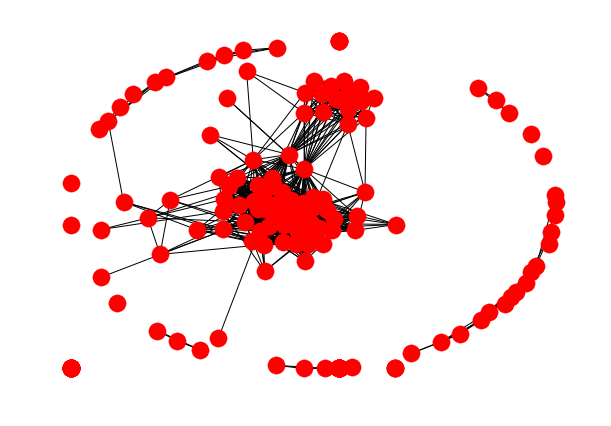

In [56]:
nx.draw(G)
nx.draw(G,pos=nx.spectral_layout(G), nodecolor='r',edge_color='b')

In [59]:
#Количество узлов
G.number_of_nodes()

119

In [60]:
#количество связей 
G.number_of_edges()

953